<a href="https://colab.research.google.com/github/ProtoSol/Daily-Data-Science/blob/main/Data_Science_Daily_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas CheatSheet and Basic Of EDA

## Reading the Documentation of the Pandas Library

The Link for the CheatSheet is as follows:
******
Link: https://pandas.pydata.org/docs/user_guide/10min.html

## Importing the Libraries

In [ ]:
import numpy as np

import pandas as pd

## Basic data structures in pandas

Pandas provides two types of classes for handling data:

Series: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

## Object creation

Creating a Series by passing a list of values, letting pandas create a default RangeIndex.


In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,-1.348884,-0.670964,1.197970,-0.307638
2013-01-02,-0.899012,-0.877151,-0.509053,0.931415
2013-01-03,-0.460408,1.319803,1.023418,-0.474093
2013-01-04,-1.166624,1.008028,-0.572672,-0.506045
2013-01-05,0.080232,-0.424441,1.106650,-0.837123
2013-01-06,0.114898,0.072627,1.960612,-0.102475


In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes:

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-1.348884,-0.670964,1.197970,-0.307638
2013-01-02,-0.899012,-0.877151,-0.509053,0.931415
2013-01-03,-0.460408,1.319803,1.023418,-0.474093
2013-01-04,-1.166624,1.008028,-0.572672,-0.506045
2013-01-05,0.080232,-0.424441,1.106650,-0.837123


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.166624,1.008028,-0.572672,-0.506045
2013-01-05,0.080232,-0.424441,1.106650,-0.837123
2013-01-06,0.114898,0.072627,1.960612,-0.102475


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.to_numpy()

array([[-1.34888419, -0.67096363,  1.19797015, -0.30763799],
       [-0.89901199, -0.87715138, -0.50905328,  0.93141547],
       [-0.46040807,  1.3198027 ,  1.02341834, -0.4740932 ],
       [-1.1666242 ,  1.00802778, -0.57267221, -0.50604455],
       [ 0.0802323 , -0.42444109,  1.10664989, -0.83712283],
       [ 0.11489818,  0.07262716,  1.96061201, -0.10247491]])

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.613300,0.071317,0.701154,-0.215993
std,0.626661,0.909120,1.018683,0.612271
min,-1.348884,-0.877151,-0.572672,-0.837123
25%,-1.099721,-0.609333,-0.125935,-0.498057
50%,-0.679710,-0.175907,1.065034,-0.390866
75%,-0.054928,0.774178,1.175140,-0.153766
max,0.114898,1.319803,1.960612,0.931415


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,6.0,-0.613300,0.626661,-1.348884,-1.099721,-0.679710,-0.054928,0.114898
B,6.0,0.071317,0.909120,-0.877151,-0.609333,-0.175907,0.774178,1.319803
C,6.0,0.701154,1.018683,-0.572672,-0.125935,1.065034,1.175140,1.960612
D,6.0,-0.215993,0.612271,-0.837123,-0.498057,-0.390866,-0.153766,0.931415


In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.307638,1.197970,-0.670964,-1.348884
2013-01-02,0.931415,-0.509053,-0.877151,-0.899012
2013-01-03,-0.474093,1.023418,1.319803,-0.460408
2013-01-04,-0.506045,-0.572672,1.008028,-1.166624
2013-01-05,-0.837123,1.106650,-0.424441,0.080232
2013-01-06,-0.102475,1.960612,0.072627,0.114898


In [ ]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-0.899012,-0.877151,-0.509053,0.931415
2013-01-01,-1.348884,-0.670964,1.197970,-0.307638
2013-01-05,0.080232,-0.424441,1.106650,-0.837123
2013-01-06,0.114898,0.072627,1.960612,-0.102475
2013-01-04,-1.166624,1.008028,-0.572672,-0.506045
2013-01-03,-0.460408,1.319803,1.023418,-0.474093


## Getitem ([])

In [ ]:
df["A"]

2013-01-01   -1.348884
2013-01-02   -0.899012
2013-01-03   -0.460408
2013-01-04   -1.166624
2013-01-05    0.080232
2013-01-06    0.114898
Freq: D, Name: A, dtype: float64

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,-1.348884,-0.670964,1.197970,-0.307638
2013-01-02,-0.899012,-0.877151,-0.509053,0.931415
2013-01-03,-0.460408,1.319803,1.023418,-0.474093


In [ ]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.899012,-0.877151,-0.509053,0.931415
2013-01-03,-0.460408,1.319803,1.023418,-0.474093
2013-01-04,-1.166624,1.008028,-0.572672,-0.506045


## Selection by label

In [ ]:
df.loc[dates[0]]

A   -1.348884
B   -0.670964
C    1.197970
D   -0.307638
Name: 2013-01-01 00:00:00, dtype: float64

In [ ]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-1.348884,-0.670964
2013-01-02,-0.899012,-0.877151
2013-01-03,-0.460408,1.319803
2013-01-04,-1.166624,1.008028
2013-01-05,0.080232,-0.424441
2013-01-06,0.114898,0.072627


In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.899012,-0.877151
2013-01-03,-0.460408,1.319803
2013-01-04,-1.166624,1.008028


In [ ]:
df.loc[dates[0], "A"]

-1.3488841949901027

In [ ]:
df.at[dates[0], "A"]

-1.3488841949901027

## Selection by position

In [ ]:
df.iloc[3]

A   -1.166624
B    1.008028
C   -0.572672
D   -0.506045
Name: 2013-01-04 00:00:00, dtype: float64

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.166624,1.008028
2013-01-05,0.080232,-0.424441


In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.899012,-0.509053
2013-01-03,-0.460408,1.023418
2013-01-05,0.080232,1.106650


In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.670964,1.197970
2013-01-02,-0.877151,-0.509053
2013-01-03,1.319803,1.023418
2013-01-04,1.008028,-0.572672
2013-01-05,-0.424441,1.106650
2013-01-06,0.072627,1.960612


For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

-0.877151377381059

In [ ]:
df.iat[1, 1]

-0.877151377381059

## Boolean indexing

In [ ]:
df[df["A"] > 0]

,A,B,C,D
2013-01-05,0.080232,-0.424441,1.106650,-0.837123
2013-01-06,0.114898,0.072627,1.960612,-0.102475


In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.197970,NaN
2013-01-02,NaN,NaN,NaN,0.931415
2013-01-03,NaN,1.319803,1.023418,NaN
2013-01-04,NaN,1.008028,NaN,NaN
2013-01-05,0.080232,NaN,1.106650,NaN
2013-01-06,0.114898,0.072627,1.960612,NaN


In [ ]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,-1.348884,-0.670964,1.197970,-0.307638,one
2013-01-02,-0.899012,-0.877151,-0.509053,0.931415,one
2013-01-03,-0.460408,1.319803,1.023418,-0.474093,two
2013-01-04,-1.166624,1.008028,-0.572672,-0.506045,three
2013-01-05,0.080232,-0.424441,1.106650,-0.837123,four
2013-01-06,0.114898,0.072627,1.960612,-0.102475,three


In [ ]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.460408,1.319803,1.023418,-0.474093,two
2013-01-05,0.080232,-0.424441,1.106650,-0.837123,four


## Setting

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [ ]:
df.at[dates[0], "A"] = 0

In [ ]:
df.iat[0, 1] = 0

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

<ipython-input-41-c9cfd4f62edf>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "D"] = np.array([5] * len(df))


In [ ]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,1.197970,5
2013-01-02,-0.899012,-0.877151,-0.509053,5
2013-01-03,-0.460408,1.319803,1.023418,5
2013-01-04,-1.166624,1.008028,-0.572672,5
2013-01-05,0.080232,-0.424441,1.106650,5
2013-01-06,0.114898,0.072627,1.960612,5


In [ ]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-1.197970,-5
2013-01-02,-0.899012,-0.877151,-0.509053,-5
2013-01-03,-0.460408,-1.319803,-1.023418,-5
2013-01-04,-1.166624,-1.008028,-0.572672,-5
2013-01-05,-0.080232,-0.424441,-1.106650,-5
2013-01-06,-0.114898,-0.072627,-1.960612,-5


## Missing data

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.197970,5,1.0
2013-01-02,-0.899012,-0.877151,-0.509053,5,1.0
2013-01-03,-0.460408,1.319803,1.023418,5,NaN
2013-01-04,-1.166624,1.008028,-0.572672,5,NaN


In [ ]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.197970,5,1.0
2013-01-02,-0.899012,-0.877151,-0.509053,5,1.0


In [ ]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,1.197970,5,1.0
2013-01-02,-0.899012,-0.877151,-0.509053,5,1.0
2013-01-03,-0.460408,1.319803,1.023418,5,5.0
2013-01-04,-1.166624,1.008028,-0.572672,5,5.0


In [ ]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations

In [ ]:
df.mean()

A   -0.388486
B    0.183144
C    0.701154
D    5.000000
dtype: float64

In [ ]:
df.mean(axis=1)

2013-01-01    1.549493
2013-01-02    0.678696
2013-01-03    1.720703
2013-01-04    1.067183
2013-01-05    1.440610
2013-01-06    1.787034
Freq: D, dtype: float64

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.460408,0.319803,0.023418,4.0
2013-01-04,-4.166624,-1.991972,-3.572672,2.0
2013-01-05,-4.919768,-5.424441,-3.893350,0.0
2013-01-06,NaN,NaN,NaN,NaN


## User defined functions

In [ ]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -2.175520
B     1.025608
C     3.926463
D    28.000000
dtype: float64

In [ ]:
df.transform(lambda x: x * 101.2)

,A,B,C,D
2013-01-01,0.000000,0.000000,121.234579,506.0
2013-01-02,-90.980013,-88.767719,-51.516192,506.0
2013-01-03,-46.593297,133.564034,103.569936,506.0
2013-01-04,-118.062369,102.012412,-57.954428,506.0
2013-01-05,8.119509,-42.953438,111.992969,506.0
2013-01-06,11.627695,7.349869,198.413935,506.0


## Value Counts

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    5
1    3
2    2
3    1
4    0
5    1
6    0
7    6
8    3
9    2
dtype: int64

In [ ]:
s.value_counts()

3    2
2    2
1    2
0    2
5    1
6    1
dtype: int64

## String Methods

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,0.428011,0.742589,-0.675108,-0.474461
1,0.147794,0.224503,-1.524275,0.741780
2,0.510717,0.837486,-0.011637,0.439292
3,0.430871,0.424348,-0.336784,0.215253
4,-0.433054,-0.039415,0.038726,0.889412
5,0.838760,-0.054774,-1.087152,1.772600
6,0.023359,-1.005804,0.495037,-0.667907
7,1.269231,1.024292,0.619215,-0.556422
8,0.348484,-0.678546,2.478452,-0.779989
9,-0.011902,-0.173629,0.052173,-1.259769


In [ ]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.428011,0.742589,-0.675108,-0.474461
1,0.147794,0.224503,-1.524275,0.741780
2,0.510717,0.837486,-0.011637,0.439292
3,0.430871,0.424348,-0.336784,0.215253
4,-0.433054,-0.039415,0.038726,0.889412
5,0.838760,-0.054774,-1.087152,1.772600
6,0.023359,-1.005804,0.495037,-0.667907
7,1.269231,1.024292,0.619215,-0.556422
8,0.348484,-0.678546,2.478452,-0.779989
9,-0.011902,-0.173629,0.052173,-1.259769


In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [ ]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

left

,key,lval
0,foo,1
1,bar,2


In [ ]:
right

,key,rval
0,foo,4
1,bar,5


In [ ]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

In [ ]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.599321,-1.469399
1,bar,one,-2.085989,-0.549533
2,foo,two,-1.511127,-1.228694
3,bar,three,-1.360799,0.133867
4,foo,two,-0.233856,0.421030
5,bar,two,0.172857,-0.106307
6,foo,one,-0.370439,-0.941645
7,foo,three,-0.174324,0.119654


In [ ]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-3.273930,-0.521972
foo,-1.690425,-3.099054


In [ ]:
df.groupby(["A", "B"]).sum()


C         D
A   B                        
bar one   -2.085989 -0.549533
    three -1.360799  0.133867
    two    0.172857 -0.106307
foo one    0.228883 -2.411043
    three -0.174324  0.119654
    two   -1.744983 -0.807664

## Pivot tables

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.101588,-0.862745
1,one,B,foo,0.148128,-0.054699
2,two,C,foo,0.804516,-0.189462
3,three,A,bar,1.587341,0.173167
4,one,B,bar,0.258430,-1.140864
5,one,C,bar,-0.291178,0.642054
6,two,A,foo,0.112913,-0.549562
7,three,B,foo,0.295237,2.747888
8,one,C,foo,-0.314938,-0.485219
9,one,A,bar,-1.436968,-0.770057


In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.436968  0.101588
      B  0.258430  0.148128
      C -0.291178 -0.314938
three A  1.587341       NaN
      B       NaN  0.295237
      C -1.031536       NaN
two   A       NaN  0.112913
      B  0.392748       NaN
      C       NaN  0.804516

## Time series

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2012-01-01    25809
Freq: 5T, dtype: int64

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -2.420673
2012-03-07   -0.389869
2012-03-08    0.430729
2012-03-09    0.835006
2012-03-10   -0.130207
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00   -2.420673
2012-03-07 00:00:00+00:00   -0.389869
2012-03-08 00:00:00+00:00    0.430729
2012-03-09 00:00:00+00:00    0.835006
2012-03-10 00:00:00+00:00   -0.130207
Freq: D, dtype: float64

In [ ]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -2.420673
2012-03-06 19:00:00-05:00   -0.389869
2012-03-07 19:00:00-05:00    0.430729
2012-03-08 19:00:00-05:00    0.835006
2012-03-09 19:00:00-05:00   -0.130207
Freq: D, dtype: float64

In [ ]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

## Categoricals

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [ ]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [ ]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)


df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [ ]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

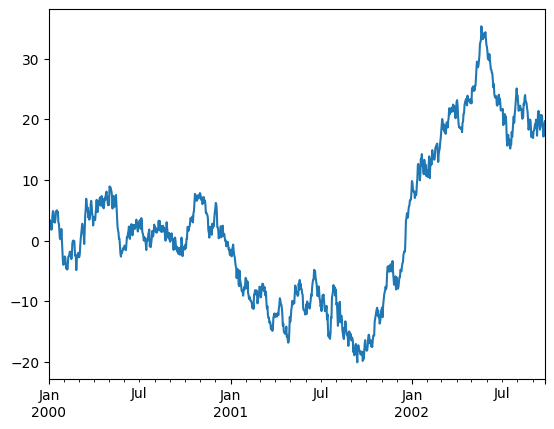

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 640x480 with 0 Axes>

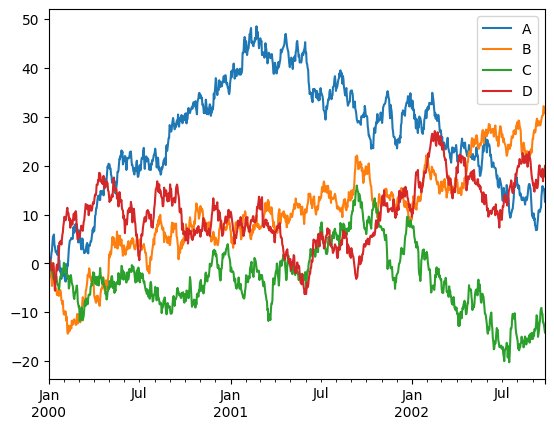

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

## Simple EDA on Bigger Dataset

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Thus we will be working on the titanic dataset.

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# Slicing
titanic.sample(100)
# Random 100 Rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
814,0,3,male,30.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
371,0,3,male,18.0,1,0,6.4958,S,Third,man,True,NaN,Southampton,no,False
125,1,3,male,12.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
670,1,2,female,40.0,1,1,39.0000,S,Second,woman,False,NaN,Southampton,yes,False
387,1,2,female,36.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0,3,male,30.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
702,0,3,female,18.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
795,0,2,male,39.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
841,0,2,male,16.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


In [ ]:
# Data Filtering
titanic[titanic['age'] < 5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
63,0,3,male,4.00,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
171,0,3,male,4.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [ ]:
titanic[titanic['fare'] < 5]
# Makes us think how they were able to get into Titanic without paying even though infants were charged

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0000,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
378,0,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True
413,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
